<a href="https://colab.research.google.com/github/shreyus3003/CMPE297_sec49/blob/master/Assignment_2/tf_linear_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear classifier using tensorflow gradient tape

This code demonstrates the automating differentiation through which gradients of arbitrary compositons of differentiable  tensor operations can be retrived without extra work other than the forward path.

GradientTape is the API.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



## Create samples
Create 1k samples to do linear classification, which consists of possitive and negative samples using numpy. We keep the binary labels.
The plot of the graph is shown below which shows 2 classes.

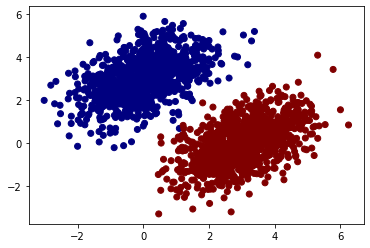

In [21]:
#dataset preparation:
samples = 1000
nsamples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]], size=samples)

psamples = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=samples)

inputs = np.vstack((nsamples, psamples)).astype(np.float32)
labels = np.vstack((np.zeros((samples, 1), dtype='float32'), np.ones((samples, 1 ),dtype='float32')))
plt.scatter(inputs[:,0], inputs[:,1], c=labels[:,0], cmap='jet')
plt.show()

## Model
Create a simple model which takes inputs and matiple it with weights which is initalized randomly. Also define a loss function wich is the sqaure of the difference of labels and predictions.
The training function uses the gardient tape to calculate the gradient and backpropogate the loss.

In [28]:
input_dim = 2
output_dim = 1

#initalize weights and bias
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def predict(inputs):
  return tf.matmul(inputs,w) + b

def cal_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels-predictions))

def training(x, y):
  learning_rate = 1e-1
  with tf.GradientTape() as tape:
    predictions = predict(x)
    loss = cal_loss(y, predictions)
  grad_w , grad_b = tape.gradient(loss, [w,b])
  w.assign_sub(grad_w * learning_rate)
  b.assign_sub(grad_b * learning_rate)
  return loss


## Train
The model is trained to predict with 20 epochs and the result is shown below with the plot of binary classes

Loss at epoch 0: 0.0290
Loss at epoch 1: 0.0286
Loss at epoch 2: 0.0283
Loss at epoch 3: 0.0280
Loss at epoch 4: 0.0277
Loss at epoch 5: 0.0275
Loss at epoch 6: 0.0272
Loss at epoch 7: 0.0270
Loss at epoch 8: 0.0268
Loss at epoch 9: 0.0266
Loss at epoch 10: 0.0265
Loss at epoch 11: 0.0263
Loss at epoch 12: 0.0262
Loss at epoch 13: 0.0261
Loss at epoch 14: 0.0259
Loss at epoch 15: 0.0258
Loss at epoch 16: 0.0257
Loss at epoch 17: 0.0257
Loss at epoch 18: 0.0256
Loss at epoch 19: 0.0255


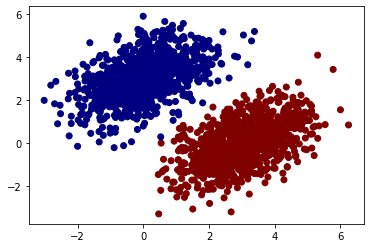

In [32]:
# Train the model:
for epoch in range(20):
  loss = training(inputs, labels)
  print("Loss at epoch %d: %.4f" %(epoch, loss))

predictions = predict(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:,0] > 0.5, cmap='jet')
plt.show()